In [81]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

FEATURES
---------------------
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2) 

Diabetes Pedigree Function: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

# Data Collection and Analysis

In [4]:
#laoding the diabetes dataset to pandas Dataframe
df = pd.read_csv("diabetes.csv")

In [5]:
#show the first 5 rows from the dataset
#0--->non-diabetic patient
#1--->diabetic patient
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#number of rows and columns in this dataset
df.shape

(768, 9)

In [9]:
#getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# check the number of diabetic and non-diabetic patient
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# check the null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#show the mean value of both the diabetic and non-diabetic people
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From the above data we can see that diabetic people have more glucose in there blood and people whose is more is more susceptible to diabetes 

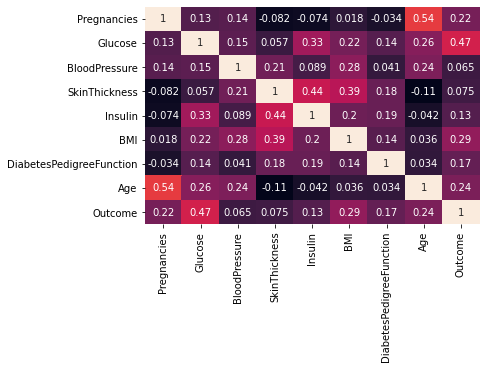

In [41]:
#Correlation matrix
sns.heatmap(df.corr(),cbar=False,annot=True);

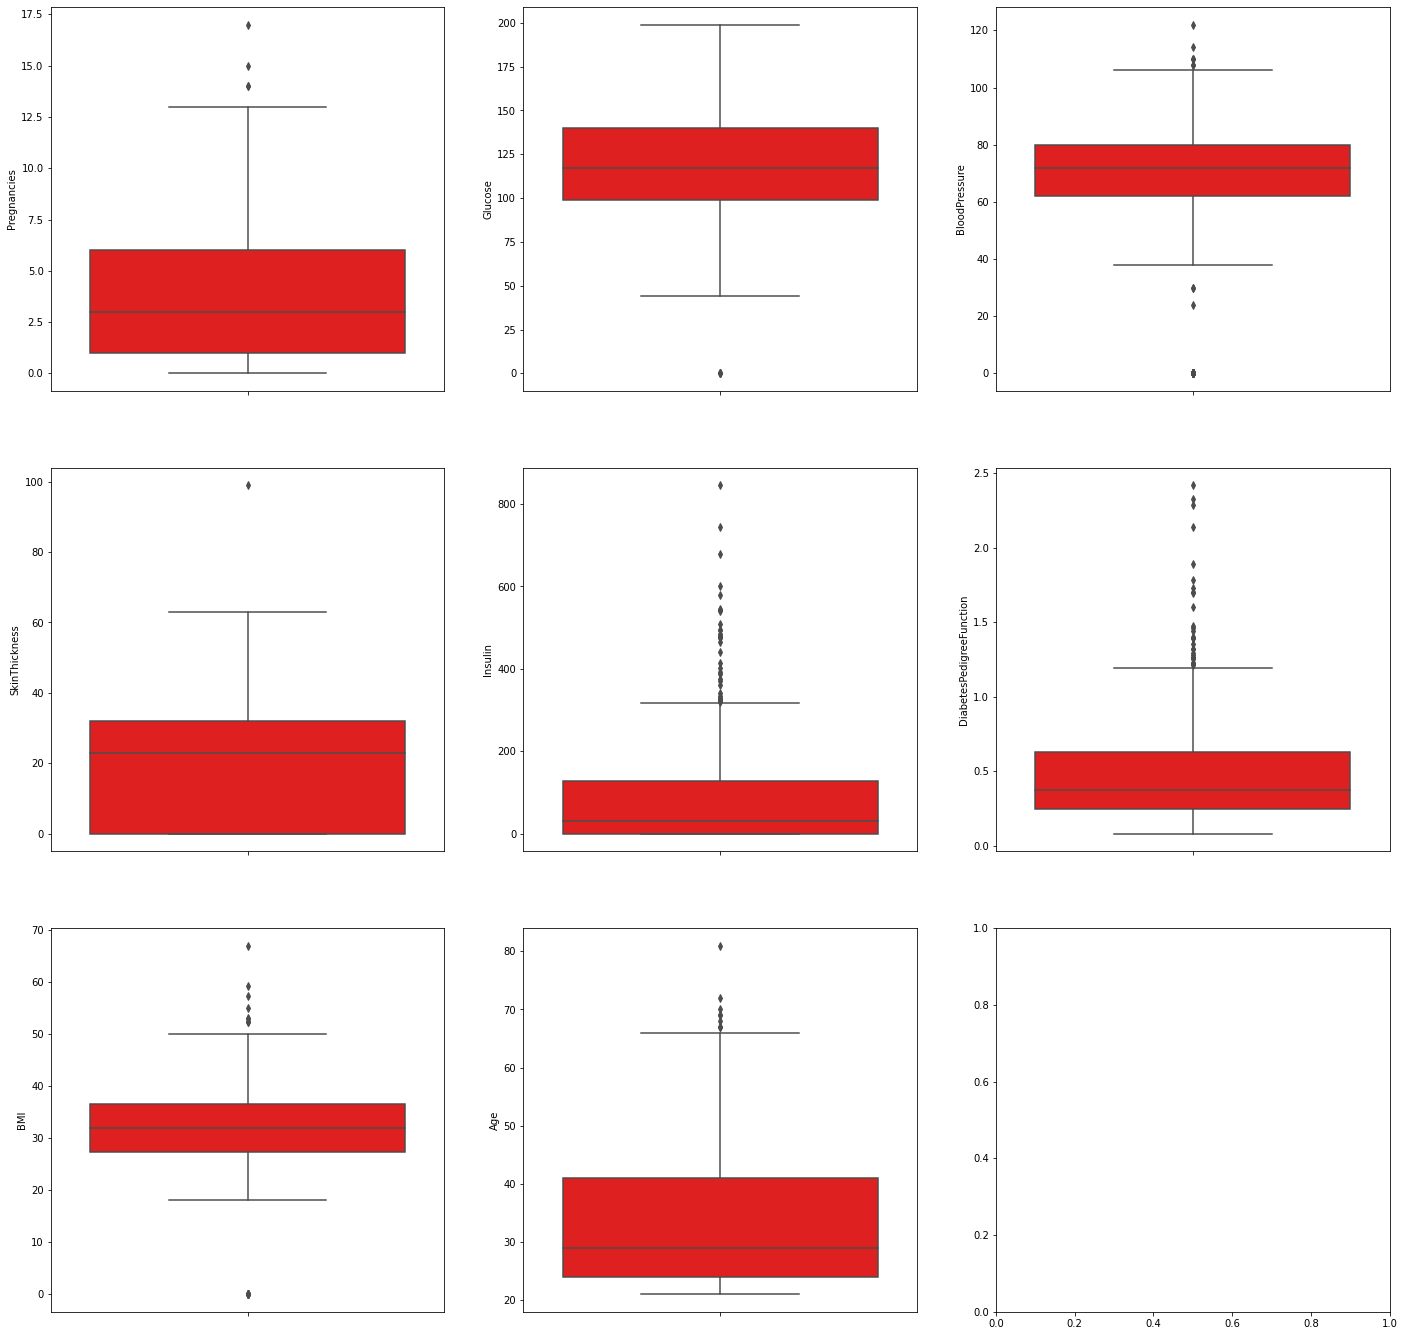

In [43]:
#sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(24,24), nrows=3, ncols=3)
sns.boxplot(data=df, y="Pregnancies", ax=ax[0,0], color='red')
sns.boxplot(data=df, y="Glucose", ax=ax[0,1], color='red')
sns.boxplot(data=df, y="BloodPressure", ax=ax[0,2], color='red')
sns.boxplot(data=df, y="SkinThickness", ax=ax[1,0], color='red')
sns.boxplot(data=df, y="Insulin", ax=ax[1,1], color='red')
sns.boxplot(data=df, y="Age", ax=ax[2,1], color='red')
sns.boxplot(data=df, y="BMI", ax=ax[2,0], color='red')
sns.boxplot(data=df, y="DiabetesPedigreeFunction", ax=ax[1,2], color='red');

In [16]:
#separating the data and labels
X=df.drop(columns="Outcome",axis=1)
y=df['Outcome']

In [18]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [24]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
standardized_data=scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [26]:
X=standardized_data
y=df['Outcome']

# Train test split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2)

In [83]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (537, 8) (231, 8)


# Training the model

In [74]:
classifier=svm.SVC(kernel='linear',random_state=42)

In [75]:
#training the Support vector machine
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [76]:
#accuracy score on the training data for SVM classifier
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print("Accuracy score of the training data: ",training_data_accuracy)

Accuracy score of the training data:  0.7821229050279329


In [77]:
#accuracy score on the test data for SVM classifier
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print("Accuracy score of the test data: ",test_data_accuracy)

Accuracy score of the test data:  0.7748917748917749


In [84]:
#accuracy score on the training data for Logistic Regression
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print("Accuracy score of the training data: ",training_data_accuracy)

Accuracy score of the training data:  0.7802607076350093


In [85]:
#accuracy score on the test data for Logistic Regression
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print("Accuracy score of the test data: ",test_data_accuracy)

Accuracy score of the test data:  0.7792207792207793


# Making a Predictive system

In [40]:
input_data=(4,110,92,0,0,37.6,0.191,30)

#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardized the input data
std_data=scaler.transform(input_data_reshaped)
print("Standardizd data",std_data)

prediction=classifier.predict(std_data)
print("prediction:",prediction)

if (prediction[0]==0):
    print("Person is not diabetic")
else:
    print("Person is diabetic")

Standardizd data [[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
prediction: [0]
Person is not diabetic
